In [49]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# data = pd.read_csv('nba_final.csv')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekend_ML_Batch/PCA_LDA/PCA/nba_final.csv')

In [51]:
data.shape

(1408, 45)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          1408 non-null   int64  
 1   Player.x    1408 non-null   object 
 2   Player_ID   1408 non-null   object 
 3   Pos1        1408 non-null   object 
 4   Pos2        12 non-null     object 
 5   Age         1408 non-null   int64  
 6   Tm          1408 non-null   object 
 7   G           1408 non-null   int64  
 8   GS          1408 non-null   int64  
 9   MP          1408 non-null   float64
 10  FG          1408 non-null   float64
 11  FGA         1408 non-null   float64
 12  FG.         1404 non-null   float64
 13  X3P         1408 non-null   float64
 14  X3PA        1408 non-null   float64
 15  X3P.        1309 non-null   float64
 16  X2P         1408 non-null   float64
 17  X2PA        1408 non-null   float64
 18  X2P.        1393 non-null   float64
 19  eFG.        1404 non-null  

In [53]:
data.head(5).T

,0,1,2,3,4
Rk,170,58,157,352,10
Player.x,A.J. Hammons,Aaron Brooks,Aaron Gordon,Adreian Payne,Al-Farouq Aminu
Player_ID,hammoaj01,brookaa01,gordoaa01,paynead01,aminual01
Pos1,C,PG,SF,PF,PF
Pos2,NaN,NaN,NaN,NaN,NaN
Age,24,32,21,25,26
Tm,DAL,IND,ORL,MIN,POR
G,22,65,80,18,61
GS,0,0,72,0,25
MP,7.4,13.8,28.7,7.5,29.1


In [56]:
data.Pos2.value_counts()

NONE    1396
SG         5
SF         3
C          2
PF         2
Name: Pos2, dtype: int64

In [55]:
import numpy as np
data['Pos2'] = data['Pos2'].replace(np.nan, 'NONE')
data['Pos2'].unique()

array(['NONE', 'C', 'SG', 'SF', 'PF'], dtype=object)

In [57]:
data.isna().sum()

Rk              0
Player.x        0
Player_ID       0
Pos1            0
Pos2            0
Age             0
Tm              0
G               0
GS              0
MP              0
FG              0
FGA             0
FG.             4
X3P             0
X3PA            0
X3P.           99
X2P             0
X2PA            0
X2P.           15
eFG.            4
FT              0
FTA             0
FT.            47
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
Salary         62
mean_views    138
Season          0
Conference      0
Role            0
Fvot            0
FRank           0
Pvot          159
PRank         159
Mvot          404
MRank         404
Score           0
Play            0
dtype: int64

In [58]:
data = data.fillna(0)

In [59]:
data.isna().sum()

Rk            0
Player.x      0
Player_ID     0
Pos1          0
Pos2          0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG.           0
X3P           0
X3PA          0
X3P.          0
X2P           0
X2PA          0
X2P.          0
eFG.          0
FT            0
FTA           0
FT.           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Salary        0
mean_views    0
Season        0
Conference    0
Role          0
Fvot          0
FRank         0
Pvot          0
PRank         0
Mvot          0
MRank         0
Score         0
Play          0
dtype: int64

In [60]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Rk,170,58,157,352,10,203,221,12,464,65
Player.x,A.J. Hammons,Aaron Brooks,Aaron Gordon,Adreian Payne,Al-Farouq Aminu,Al Horford,Al Jefferson,Alan Anderson,Alan Williams,Alec Burks
Player_ID,hammoaj01,brookaa01,gordoaa01,paynead01,aminual01,horfoal01,jeffeal01,anderal01,willial03,burksal01
Pos1,C,PG,SF,PF,PF,C,C,SF,C,SG
Pos2,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
Age,24,32,21,25,26,30,32,34,24,25
Tm,DAL,IND,ORL,MIN,POR,BOS,IND,LAC,PHO,UTA
G,22,65,80,18,61,68,66,30,47,42
GS,0,0,72,0,25,68,1,0,0,0
MP,7.4,13.8,28.7,7.5,29.1,32.3,14.1,10.3,15.1,15.5


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          1408 non-null   int64  
 1   Player.x    1408 non-null   object 
 2   Player_ID   1408 non-null   object 
 3   Pos1        1408 non-null   object 
 4   Pos2        1408 non-null   object 
 5   Age         1408 non-null   int64  
 6   Tm          1408 non-null   object 
 7   G           1408 non-null   int64  
 8   GS          1408 non-null   int64  
 9   MP          1408 non-null   float64
 10  FG          1408 non-null   float64
 11  FGA         1408 non-null   float64
 12  FG.         1408 non-null   float64
 13  X3P         1408 non-null   float64
 14  X3PA        1408 non-null   float64
 15  X3P.        1408 non-null   float64
 16  X2P         1408 non-null   float64
 17  X2PA        1408 non-null   float64
 18  X2P.        1408 non-null   float64
 19  eFG.        1408 non-null  

In [62]:
data = data.drop(['Player.x','Player_ID'], axis=1)

In [63]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

data['Pos1'] = Le.fit_transform(data['Pos1'])
data['Pos2'] = Le.fit_transform(data['Pos2'])
data['Tm'] = Le.fit_transform(data['Tm'])
data['Season'] = Le.fit_transform(data['Season'])
data['Conference'] = Le.fit_transform(data['Conference'])
data['Role'] = Le.fit_transform(data['Role'])
data['Play'] = Le.fit_transform(data['Play'])

In [64]:
data.head()

,Rk,Pos1,Pos2,Age,Tm,G,GS,MP,FG,FGA,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,0,1,24,6,22,0,7.4,0.8,1.9,...,1,1,786,123,0.0,0.0,0.0,0.0,83.5,0
1,58,2,1,32,11,65,0,13.8,1.9,4.6,...,0,0,2474,64,0.0,0.0,0.0,0.0,48.2,0
2,157,3,1,21,21,80,72,28.7,4.9,10.8,...,0,1,22774,29,0.0,0.0,0.0,0.0,40.0,0
3,352,1,1,25,17,18,0,7.5,1.3,3.0,...,1,1,861,120,1.0,52.0,0.0,0.0,75.5,0
4,10,1,1,26,24,61,25,29.1,3.0,7.6,...,1,1,4971,69,7.0,23.0,0.0,0.0,42.8,0


In [65]:
features = data.drop(['Play'], axis=1)

In [66]:
X = data.drop(['Play'], axis=1)
y = data['Play']

In [67]:
#standardize
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [68]:
X

array([[-0.58191469, -1.40108842, -0.07184075, ..., -0.16623906,
        -1.46817686,  0.19138945],
       [-1.32505241, -0.01428174, -0.07184075, ..., -0.16623906,
        -1.46817686, -0.66146791],
       [-0.66817174,  0.67912159, -0.07184075, ..., -0.16623906,
        -1.46817686, -0.85958209],
       ...,
       [ 0.33373715,  1.37252493, -0.07184075, ..., -0.16623906,
         0.83574403,  1.36799438],
       [ 0.8977256 , -1.40108842, -0.07184075, ..., -0.16623906,
         0.54775392, -0.13960618],
       [ 1.32237572,  1.37252493, -0.07184075, ..., -0.16623906,
         0.83574403,  1.09256735]])

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=29)

In [70]:
X_train.shape

(985, 42)

In [71]:
# Building NON PCA Model
#logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

from sklearn.metrics import classification_report

cr = classification_report(lr_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       408
           1       0.74      0.93      0.82        15

    accuracy                           0.99       423
   macro avg       0.87      0.96      0.91       423
weighted avg       0.99      0.99      0.99       423



In [72]:
cr = classification_report(lr.predict(X_train), y_train)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       934
           1       0.85      0.90      0.88        51

    accuracy                           0.99       985
   macro avg       0.92      0.95      0.93       985
weighted avg       0.99      0.99      0.99       985



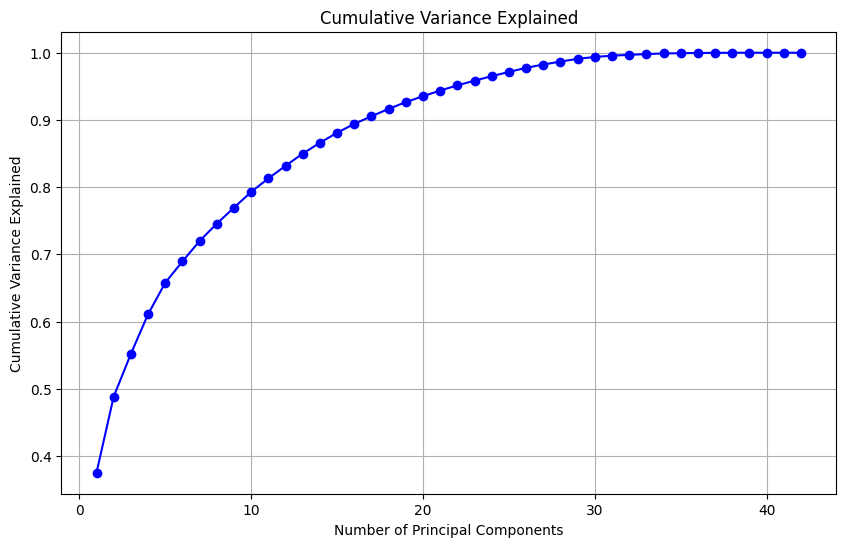

In [108]:
import matplotlib.pyplot as plt  # Not executed yet
from sklearn.decomposition import PCA

def plot_cumulative_variance(X):
    # Initialize PCA
    pca = PCA()
    pca.fit(X)

    # Calculate cumulative variance explained
    cumulative_variance = pca.explained_variance_ratio_.cumsum()

    # Plot cumulative variance explained
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
    plt.title('Cumulative Variance Explained')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.grid()
    plt.show()

# Usage:
# Replace 'X' with your dataset
plot_cumulative_variance(X)


In [81]:
#PCA
from sklearn.decomposition import PCA



# n_components = 0.8 means that use those many principal components which are capturing 80% of the total variance
# n_components = 5 mean that run PCA for 5 components
p = PCA(n_components=16)
pca_data = p.fit_transform(X)

In [82]:
X.shape

(1408, 42)

In [83]:
pca_data.shape

(1408, 16)

In [88]:
p.explained_variance_ratio_.cumsum()*100

array([37.51746824, 48.83573112, 55.19324557, 61.09548301, 65.77594974,
       68.94853   , 71.99525242, 74.57278061, 76.95018419, 79.29210852,
       81.30033055, 83.17242508, 84.98785807, 86.60095726, 88.08908796,
       89.4154951 ])

In [105]:
p.components_ #eigen values

array([[-1.65237359e-02, -1.10773328e-02,  2.95174377e-03,
         3.09971802e-02,  3.67819739e-03,  1.53313393e-01,
         1.99823162e-01,  2.26895071e-01,  2.41709381e-01,
         2.35303995e-01,  7.79831978e-02,  1.45235030e-01,
         1.46911078e-01,  5.55989501e-02,  2.27617889e-01,
         2.26950978e-01,  6.72593141e-02,  7.31305857e-02,
         2.20278336e-01,  2.22862696e-01,  9.44279848e-02,
         1.19958751e-01,  1.98560288e-01,  1.85491816e-01,
         1.79342852e-01,  1.80614585e-01,  1.27289573e-01,
         2.19254456e-01,  1.73133618e-01,  2.41964871e-01,
         1.70486563e-01,  1.27543405e-01, -9.38428227e-03,
         3.06608621e-03, -7.18465670e-04,  1.48131564e-01,
        -1.83840263e-01,  1.63650209e-01, -1.27826338e-01,
         1.28894452e-01, -3.31711525e-02, -1.73081711e-01],
       [ 1.62654473e-02, -3.43414666e-01, -1.74327771e-02,
        -3.65724138e-02,  2.74513110e-02,  1.37558909e-02,
         1.47196178e-02, -4.32082051e-02, -2.31664151e-

In [107]:
# # # Making a new dataframe with first 5 principal components as columns and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10']

pc1 = pd.DataFrame(np.round(p.components_.T[:, 0:10], 2), index = features.columns, columns = cols) #vector loading
pc1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Rk,-0.02,0.02,-0.04,0.10,-0.05,0.37,-0.16,0.32,-0.50,0.46
Pos1,-0.01,-0.34,-0.10,0.01,0.02,0.11,0.11,-0.06,0.12,-0.11
Pos2,0.00,-0.02,-0.03,0.04,-0.01,-0.19,0.16,0.07,0.63,0.68
Age,0.03,-0.04,-0.03,-0.05,0.17,-0.58,-0.11,0.45,-0.22,0.09
Tm,0.00,0.03,-0.02,-0.01,-0.03,-0.03,0.64,-0.08,-0.28,0.22
G,0.15,0.01,-0.24,-0.15,0.02,-0.10,-0.04,-0.07,0.00,-0.04
GS,0.20,0.01,-0.10,-0.04,-0.13,-0.06,-0.01,-0.06,-0.02,-0.02
MP,0.23,-0.04,-0.18,-0.03,-0.10,-0.04,-0.02,-0.03,-0.02,-0.01
FG,0.24,-0.02,-0.04,0.04,-0.04,0.08,0.02,-0.02,-0.00,0.03
FGA,0.24,-0.09,-0.05,0.05,-0.08,0.06,-0.00,-0.03,-0.02,0.04


In [89]:
data.head()

,Rk,Pos1,Pos2,Age,Tm,G,GS,MP,FG,FGA,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,0,1,24,6,22,0,7.4,0.8,1.9,...,1,1,786,123,0.0,0.0,0.0,0.0,83.5,0
1,58,2,1,32,11,65,0,13.8,1.9,4.6,...,0,0,2474,64,0.0,0.0,0.0,0.0,48.2,0
2,157,3,1,21,21,80,72,28.7,4.9,10.8,...,0,1,22774,29,0.0,0.0,0.0,0.0,40.0,0
3,352,1,1,25,17,18,0,7.5,1.3,3.0,...,1,1,861,120,1.0,52.0,0.0,0.0,75.5,0
4,10,1,1,26,24,61,25,29.1,3.0,7.6,...,1,1,4971,69,7.0,23.0,0.0,0.0,42.8,0


In [90]:
pd.DataFrame(pca_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-4.221712,0.403962,2.101130,-1.923955,0.350651,-0.086929,-0.263723,-1.621113,-0.400291,0.402865,0.246949,1.943251,-0.571610,0.298890,1.730947,1.041516
1,-2.049839,-1.998276,0.548793,-2.844776,0.802644,-0.714351,-0.755770,0.418071,0.624921,-0.252373,-0.758366,-0.408521,0.534016,-0.406770,0.806596,0.547115
2,2.842995,0.246162,-0.169588,-2.474044,-0.892896,0.743263,-0.052965,-1.359154,0.449777,0.047545,0.553961,-0.286605,0.866375,0.151034,-1.179401,0.061749
3,-3.555854,0.908923,1.453618,-1.249590,0.259064,0.213017,0.579539,-0.510259,-1.089649,1.038073,-0.622289,0.318874,-1.107905,-0.482518,-0.410774,0.072368
4,1.492529,0.738592,0.483142,-2.014101,-1.037878,-1.743318,0.846314,-1.892193,-0.578012,-0.055162,0.149564,0.232417,0.132697,-0.830786,0.270408,0.697528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,-0.889306,2.373146,-0.756403,0.791837,0.000844,-0.435874,1.253089,-1.543228,0.176800,-0.505767,-0.414844,-0.908177,-0.348867,0.753303,0.497971,1.154582
1404,7.393132,-2.320152,-0.832513,1.500335,-1.180346,1.947637,-0.685082,1.139435,1.255290,-0.478586,-0.999433,1.417714,0.409004,0.912001,-0.210820,-0.300328
1405,-7.128921,-3.729133,4.501645,2.666407,-5.791439,-0.713304,-0.867791,0.609892,0.091035,-0.741447,1.969394,0.225707,0.899957,-0.773195,0.108840,-0.888097
1406,-1.784659,2.023181,0.720986,0.279048,-0.593004,-1.209245,-1.560869,1.973423,-0.013952,0.040014,-0.568338,-1.660313,-0.550808,0.569910,0.056476,0.196090


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size= 0.3, random_state=29)

In [92]:
X_train.shape

(985, 16)

In [93]:
#logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [94]:
lr.fit(X_train, y_train)

LogisticRegression()

In [95]:
lr_pred = lr.predict(X_test)

In [96]:
from sklearn.metrics import classification_report

cr = classification_report(lr_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       406
           1       0.84      0.94      0.89        17

    accuracy                           0.99       423
   macro avg       0.92      0.97      0.94       423
weighted avg       0.99      0.99      0.99       423



In [97]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [98]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [99]:
pred_dt = dt.predict(X_test)

In [100]:
pred_dt

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
cr_dt = classification_report(pred_dt, y_test)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       406
           1       0.68      0.76      0.72        17

    accuracy                           0.98       423
   macro avg       0.84      0.87      0.85       423
weighted avg       0.98      0.98      0.98       423



In [101]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [102]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
pred_rf = rf.predict(X_test)

In [104]:
cr_rf = classification_report(pred_rf, y_test)
print(cr_rf)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       409
           1       0.68      0.93      0.79        14

    accuracy                           0.98       423
   macro avg       0.84      0.96      0.89       423
weighted avg       0.99      0.98      0.98       423

